In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
scores = pd.read_csv('pd_data/judge_scores.csv')

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def is_gpf(segment_name):
    return 1 if segment_name.startswith('gpf') and not segment_name.startswith('gpfra') else 0
def is_ecfc(segment_name):
    return 1 if segment_name.startswith('ec') or segment_name.startswith('fc') else 0
def is_wc(segment_name):
    return 1 if segment_name.startswith('wc') else 0
def is_owg(segment_name):
    return 1 if segment_name.startswith('owg') else 0

In [4]:
scores['is_gpf'] = scores.apply(lambda row: is_gpf(row.segment_name), axis=1)

In [5]:
scores['is_ecfc'] = scores.apply(lambda row: is_ecfc(row.segment_name), axis=1)
scores['is_wc'] = scores.apply(lambda row: is_wc(row.segment_name), axis=1)
scores['is_owg'] = scores.apply(lambda row: is_owg(row.segment_name), axis=1)

In [6]:
goes = scores[scores.is_comp == 0]
comp = scores[scores.is_comp == 1]
comp = comp[comp.judge_score > 2.]
# comp['log_judge_score'] = comp.apply(lambda row: np.log(row.judge_score), axis=1)

In [14]:
competition_type = ols('judge_score ~ skater + judge + same_country + is_gpf + is_ecfc + is_wc + is_owg', data=goes).fit()

In [15]:
competition_type.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            judge_score   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     93.25
Date:                Fri, 23 Mar 2018   Prob (F-statistic):               0.00
Time:                        02:18:10   Log-Likelihood:            -2.8614e+05
No. Observations:              173158   AIC:                         5.735e+05
Df Residuals:                  172567   BIC:                         5.794e+05
Df Model:                         590                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 -1.0587      0.105    -10.043      0.000      -1.265      -0.852
skater[T.Adam RIPPON]                                      2.1732      0.102     21.268      0.000       1.973       2.373
skater[T.Adel TANKOVA / Ronald ZILBERBERG]                 0.6005      0.146      4.123      0.000       0.315       0.886
skater[T.Adele MORRISON / Demid ROKACHEV]                  0.3533      0.149      2.376      0.018       0.062       0.645
skater[T.Aimee BUCHANAN]                                   0.2080      0.149      1.398      0.162      -0.084       0.500
skater[T.Aiza MAMBEKOVA]                                   0.7724      0.127      6.071      0.000       0.523       1.022
skater[T.Alaine CHARTRAND]                                 0.9017      0.104      8.698      0.000       0.698       1.105
skater[T.Alena LEONOVA]                                    1.4622      0.111     13.151      0.000       1.244       1.680
skater[T.Alexa SCIMECA KNIERIM / Chris KNIERIM]            1.7536      0.105     16.671      0.000       1.547       1.960
skater[T.Alexander BOROVOJ]                                1.1123      0.187      5.954      0.000       0.746       1.478
skater[T.Alexander MAJOROV]                                1.0274      0.105      9.819      0.000       0.822       1.233
skater[T.Alexander MASZLJANKO]                             1.2487      0.187      6.665      0.000       0.881       1.616
skater[T.Alexander PETROV]                                 1.2772      0.110     11.573      0.000       1.061       1.494
skater[T.Alexander SAMARIN]                                1.3144      0.107     12.301      0.000       1.105       1.524
skater[T.Alexandra NAZAROVA / Maxim NIKITIN]               2.0893      0.108     19.381      0.000       1.878       2.301
skater[T.Alexandra PAUL / Mitchell ISLAM]                  1.8615      0.149     12.477      0.000       1.569       2.154
skater[T.Alexandra STEPANOVA / Ivan BUKIN]                 2.9096      0.105     27.647      0.000       2.703       3.116
skater[T.Alexei BYCHENKO]                                  1.5608      0.101     15.411      0.000       1.362       1.759
skater[T.Alexia PAGANINI]                                  1.1855      0.118     10.035      0.000       0.954       1.417
skater[T.Alicia PINEAULT]                                  0.9646      0.137      7.028      0.000       0.696       1.234
skater[T.Alina ZAGITOVA]                                   2.6676      0.105     25.369      0.000       2.462       2.874
skater[T.Alisa AGAFONOVA / Alper UCAR]                     1.8536      0.104     17.766      0.000       1.649       2.058
skater[T

In [20]:
max(competition_type.fittedvalues)

3.0407565763629405

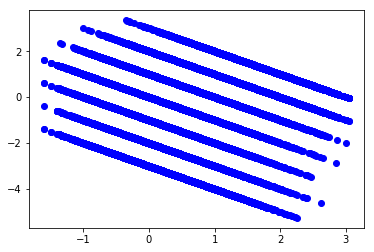

In [21]:
plt.plot(competition_type.fittedvalues, competition_type.resid, 'bo')

In [ ]:
X = pd.concat([pd.get_dummies(comp.skater), comp.same_country])

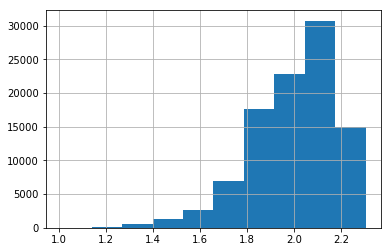

In [14]:
comp.log_judge_score.hist()

In [19]:
comp_skater_same_country = ols('judge_score ~ skater + same_country', data=comp).fit()
comp_skater_same_country.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            judge_score   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1703.
Date:                Thu, 22 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:56:27   Log-Likelihood:                -67755.
No. Observations:               97651   AIC:                         1.362e+05
Df Residuals:                   97307   BIC:                         1.395e+05
Df Model:                         343                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                  5.6955      0.051    111.367      0.000       5.595       5.796
skater[T.Adam RIPPON]                                      2.8906      0.055     52.875      0.000       2.783       2.998
skater[T.Adel TANKOVA / Ronald ZILBERBERG]                -0.3553      0.066     -5.382      0.000      -0.485      -0.226
skater[T.Adele MORRISON / Demid ROKACHEV]                 -1.3500      0.072    -18.667      0.000      -1.492      -1.208
skater[T.Aimee BUCHANAN]                                  -1.1510      0.072    -15.915      0.000      -1.293      -1.009
skater[T.Aiza MAMBEKOVA]                                  -0.2454      0.066     -3.717      0.000      -0.375      -0.116
skater[T.Alaine CHARTRAND]                                 1.3569      0.055     24.567      0.000       1.249       1.465
skater[T.Alena LEONOVA]                                    1.6093      0.059     27.253      0.000       1.494       1.725
skater[T.Alexa SCIMECA KNIERIM / Chris KNIERIM]            2.1070      0.056     37.613      0.000       1.997       2.217
skater[T.Alexander BOROVOJ]                               -0.6399      0.089     -7.224      0.000      -0.814      -0.466
skater[T.Alexander MAJOROV]                                1.3357      0.056     23.844      0.000       1.226       1.446
skater[T.Alexander MASZLJANKO]                            -0.4232      0.089     -4.778      0.000      -0.597      -0.250
skater[T.Alexander PETROV]                                 1.4972      0.059     25.356      0.000       1.381       1.613
skater[T.Alexander SAMARIN]                                2.0333      0.057     35.563      0.000       1.921       2.145
skater[T.Alexandra NAZAROVA / Maxim NIKITIN]               1.8504      0.056     33.285      0.000       1.741       1.959
skater[T.Alexandra PAUL / Mitchell ISLAM]                  1.6417      0.072     22.700      0.000       1.500       1.783
skater[T.Alexandra STEPANOVA / Ivan BUKIN]                 2.9963      0.055     54.808      0.000       2.889       3.103
skater[T.Alexei BYCHENKO]                                  2.1994      0.054     40.549      0.000       2.093       2.306
skater[T.Alexia PAGANINI]                                  0.4860      0.063      7.760      0.000       0.363       0.609
skater[T.Alicia PINEAULT]                                  0.6278      0.072      8.681      0.000       0.486       0.770
skater[T.Alina ZAGITOVA]                                   3.0507      0.056     54.459      0.000       2.941       3.161
skater[T.Alisa AGAFONOVA / Alper UCAR]                     1.5169      0.054     27.966      0.000       1.411       1.623
skater[T

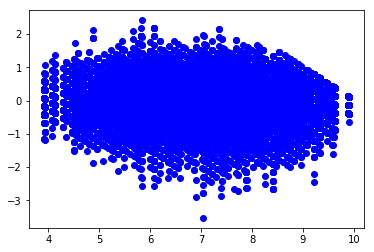

In [20]:
plt.plot(comp_skater_same_country.fittedvalues, comp_skater_same_country.resid, 'bo')

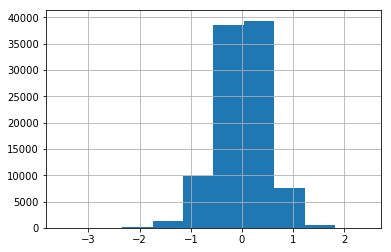

In [21]:
comp_skater_same_country.resid.hist()

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
for i in xrange(comp_skater_same_country.model.exog.shape[1]):
    print variance_inflation_factor(comp_skater_same_country.model.exog, i)
# [variance_inflation_factor(comp_skater_same_country.model.exog, i) for i in xrange(comp_skater_same_country.model.exog.shape[1])]

1085.17700741
7.94839305074
2.49664560544
1.9981567009
1.99830945824
2.4965438142
6.96129071899
3.98894020543
5.9723809523
1.49938517673
5.97247226849
1.49938517673
3.98894020543
4.98165269724
6.46705794335
1.9981567009
7.94840932701
8.933717118
2.99464179618
1.9981567009
5.97235812325
8.93366020392
1.9981567009
8.93366020392
2.99447010271
1.9981567009
3.49207285781
2.99447010271
5.97311148185
1.49938517673
1.9981567009
2.99447010271
1.9981567009
4.98160509269
3.98895291172
2.4967728445
9.91715683929
3.98925786271
3.98925786271
6.96139208748
1.9981567009
3.49195082105
2.99454641092
1.49930876284
1.99830945824
1.99819489024
2.99447010271
3.98894020543
5.47722301016
1.49938517673
1.9981567009
1.49930876284
8.93364123255
2.99447010271
7.94843645412
1.9981567009
2.99447010271
1.9981567009
2.98341009004
2.99447010271
7.948653471
4.48552756392
6.45623437306
1.9981567009
8.93375980357
7.45506958454
3.49231693134
2.99477533554
1.49938517673
1.49938517673
2.99448917976
3.98894020543
7.948523260

KeyboardInterrupt: 

In [ ]:
ols('judge_score ~ skater + same_country', data=goes).fit().summary()